In [1]:
import matplotlib.pyplot as plt

In [15]:
def call_payoff_plot(l_strike,h_strike,c_l,c_h,s0):
    x=[]
    y=[]

    for i in range(int(s0)-300,h_strike+300):
        x.append(i)
        if i<=l_strike:
            y.append(c_h-c_l)
        elif i<h_strike:
            y.append(-i+l_strike+c_h-c_l)
        elif i>=h_strike:
            y.append(c_h-c_l+l_strike-h_strike)
    plt.figure(figsize=(16,6))
    plt.plot(x,y)
    plt.axhline(y[0],ls=":",label=round(y[0],2))
    plt.axvline(l_strike,ls=":",color="green")
    plt.axvline(h_strike,ls=":",color="green")
    
    plt.axvline(s0,ls=":",color="red")
    plt.text(s0,0,s0,horizontalalignment='left',verticalalignment="bottom",fontsize=12,color="red")
    
    plt.axhline(y[-1],ls=":",label=round(y[-1],2))
    plt.axhline(0,color="k",ls=":")
    plt.axvline(l_strike+c_h-c_l,color="k")
    plt.text(l_strike+c_h-c_l,0,round(l_strike+c_h-c_l,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payout")
    plt.legend(loc=5)
    plt.title("R2R = "+str(round(abs(y[0]/y[-1]),2)))

def put_payoff_plot(l_strike,h_strike,p_l,p_h,s0):
    
    x=[]
    y=[]

    for i in range(int(s0)-300,h_strike+300):
        x.append(i)
        if i<=l_strike:
            y.append(p_l-p_h+h_strike-l_strike)
        elif i<h_strike:
            y.append(-i+h_strike+p_l-p_h)
        elif i>=h_strike:
            y.append(p_l-p_h)
    plt.figure(figsize=(16,6))
    plt.plot(x,y)
    plt.axhline(y[0],ls=":",label=round(y[0],2))
    plt.axvline(l_strike,ls=":",color="green")
    plt.axvline(h_strike,ls=":",color="green")
    
    plt.axvline(s0,ls=":",color="red")
    plt.text(s0,0,s0,horizontalalignment='left',verticalalignment="bottom",fontsize=12,color="red")
    
    plt.axhline(y[-1],ls=":",label=round(y[-1],2))
    plt.axhline(0,color="k",ls=":")
    plt.axvline(h_strike+p_l-p_h,color="k")
    plt.text(h_strike+p_l-p_h,0,round(h_strike+p_l-p_h,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payout")
    plt.legend(loc=5)
    plt.title("R2R = "+str(round(abs(y[0]/y[-1]),2)))
    
    
def call_r2r_payoff(l_strike,h_strike,c_h,c_l,s0):
    
    x=[]
    y=[]

    for i in range(int(s0)-300,h_strike+300):
        x.append(i)
        if i<=l_strike:
            y.append(c_h-c_l)
        elif i<h_strike:
            y.append(-i+l_strike+c_h-c_l)
        elif i>=h_strike:
            y.append(c_h-c_l+l_strike-h_strike)
    return [round(abs(y[0]/y[-1]),2),l_strike,h_strike,c_l,c_h,s0]

def put_r2r_payoff(l_strike,h_strike,p_l,p_h,s0):
    
    x=[]
    y=[]

    for i in range(int(s0)-300,h_strike+300):
        x.append(i)
        if i<=l_strike:
            y.append(p_l-p_h+h_strike-l_strike)
        elif i<h_strike:
            y.append(-i+h_strike+p_l-p_h)
        elif i>=h_strike:
            y.append(p_l-p_h)
    return [round(abs(y[0]/y[-1]),2),l_strike,h_strike,p_l,p_h,s0]

[1.74, 13500, 13550, 85.15, 116.9, 13567.85]


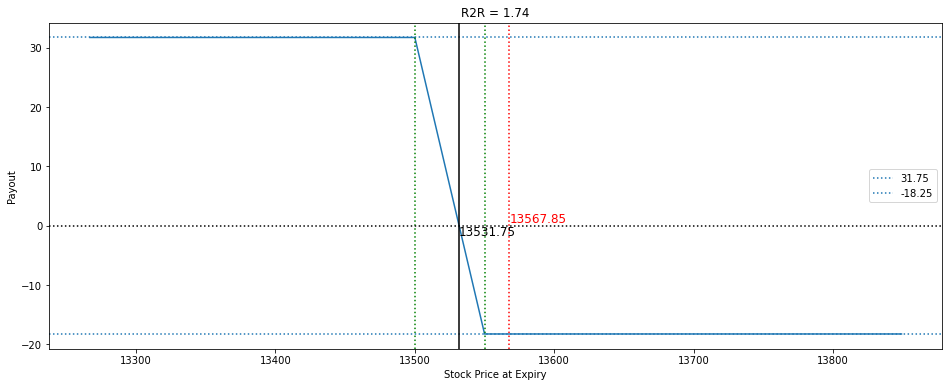

In [16]:
s0=13567.85

arr=[[13500,116.9],[13550,85.15],[13600,60]]

l=len(arr)
opti=[0,0,0]
for i in range(l):
    for j in range(i+1,l):
        l_strike=arr[i][0]
        c_l=arr[i][1]
        h_strike=arr[j][0]
        c_h=arr[j][1]
        r2r=call_r2r_payoff(l_strike,h_strike,c_l,c_h,s0)
        if opti[0]<r2r[0]:
            opti=r2r

print(opti)
call_payoff_plot(opti[1],opti[2],opti[3],opti[4],opti[5])


[1.63, 13500, 13550, 42.5, 61.5, 13567.85]


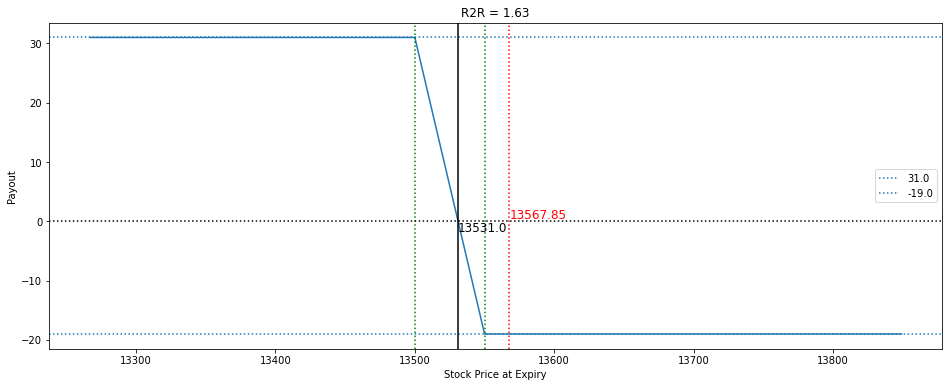

In [19]:
s0=13567.85

arr=[[13500,42.5],[13550,61.5],[13600,85.8]]

l=len(arr)
opti=[0,0,0]
for i in range(l):
    for j in range(i+1,l):
        l_strike=arr[i][0]
        p_l=arr[i][1]
        h_strike=arr[j][0]
        p_h=arr[j][1]
        r2r=put_r2r_payoff(l_strike,h_strike,p_l,p_h,s0)
        if opti[0]<r2r[0]:
            opti=r2r

print(opti)
put_payoff_plot(opti[1],opti[2],opti[3],opti[4],opti[5])